In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
RED_DATASET_URL = "./winequality-red.csv"
WHITE_DATASET_URL = "./winequality-white.csv"
FEATURES = [
	"fixed_acidity",
	"volatile_acidity",
	"citric_acid",
	"residual_sugar",
	"chlorides",
	"free_sulfur_dioxide",
	"total_sulfur_dioxide",
	"density",
	"pH",
	"sulphates",
	"alcohol"
]
LABEL = "quality"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"fixed_acidity": "float32",
	"volatile_acidity": "float32",
	"citric_acid": "float32",
	"residual_sugar": "float32",
	"chlorides": "float32",
	"free_sulfur_dioxide": "float32",
	"total_sulfur_dioxide": "float32",
	"density": "float32",
	"pH": "float32",
	"sulphates": "float32",
	"alcohol": "float32",
	"quality": "category"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
red_data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), RED_DATASET_URL), names=COLUMNS, index_col=False, dtype=DTYPE, skipinitialspace=True, delimiter=';', skiprows=1)
white_data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), WHITE_DATASET_URL), names=COLUMNS, index_col=False, dtype=DTYPE, skipinitialspace=True, delimiter=';', skiprows=1)

In [5]:
red_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
FEATURES = FEATURES + ['type']
COLUMNS = COLUMNS + ['type']

red_data['type'] = 'red'
white_data['type'] = 'white'

data = red_data.append(white_data)
data['type'] = data['type'].astype("category")
data = data.reset_index(drop=True)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float32 
 1   volatile_acidity      6497 non-null   float32 
 2   citric_acid           6497 non-null   float32 
 3   residual_sugar        6497 non-null   float32 
 4   chlorides             6497 non-null   float32 
 5   free_sulfur_dioxide   6497 non-null   float32 
 6   total_sulfur_dioxide  6497 non-null   float32 
 7   density               6497 non-null   float32 
 8   pH                    6497 non-null   float32 
 9   sulphates             6497 non-null   float32 
 10  alcohol               6497 non-null   float32 
 11  quality               6497 non-null   object  
 12  type                  6497 non-null   category
dtypes: category(1), float32(11), object(1)
memory usage: 336.5+ KB


In [9]:
# Missing values
data = data.dropna()
data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [10]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-2.549418e-09,1.976391e-09,-4.558851e-09,-6.828492e-09,-9.213376e-09,-4.034363e-09,-7.221369e-09,-8.190966e-09,-1.154843e-08,-1.351586e-08,1.712167e-08
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530185e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00
25%,-6.289328e-01,-6.661612e-01,-4.723335e-01,-7.657979e-01,-5.147987e-01,-7.620742e-01,-6.855323e-01,-7.859430e-01,-6.748628e-01,-6.805918e-01,-8.316151e-01
50%,-1.660892e-01,-3.016940e-01,-5.941374e-02,-5.135612e-01,-2.578827e-01,-8.594301e-02,3.990668e-02,6.448044e-02,-5.287401e-02,-1.429374e-01,-1.608229e-01
75%,3.738950e-01,3.664962e-01,4.911458e-01,5.584445e-01,2.559493e-01,5.901883e-01,7.122647e-01,7.648607e-01,6.313121e-01,4.619242e-01,6.776672e-01
max,6.699425e+00,7.534354e+00,9.231280e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923030e+00,9.870879e+00,3.696231e+00


In [11]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

[0, 1]


In [12]:
data = data.astype(dtype=DTYPE)
data.dtypes

fixed_acidity            float32
volatile_acidity         float32
citric_acid              float32
residual_sugar           float32
chlorides                float32
free_sulfur_dioxide      float32
total_sulfur_dioxide     float32
density                  float32
pH                       float32
sulphates                float32
alcohol                  float32
quality                 category
type                    category
dtype: object

In [13]:
# Class Balance
data[LABEL].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [14]:
# Label Encode
labelencoder = preprocessing.LabelEncoder()
data[LABEL] = labelencoder.fit_transform(data[LABEL])
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034990,1.813089,0.193097,-0.915464,2,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701488,-0.115073,0.999579,-0.580068,2,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768180,0.258120,0.797958,-0.580068,2,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101702,-0.363868,0.327510,-0.580068,3,0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034990,1.813089,0.193097,-0.915464,2,0


In [15]:
data[LABEL].nunique()

7

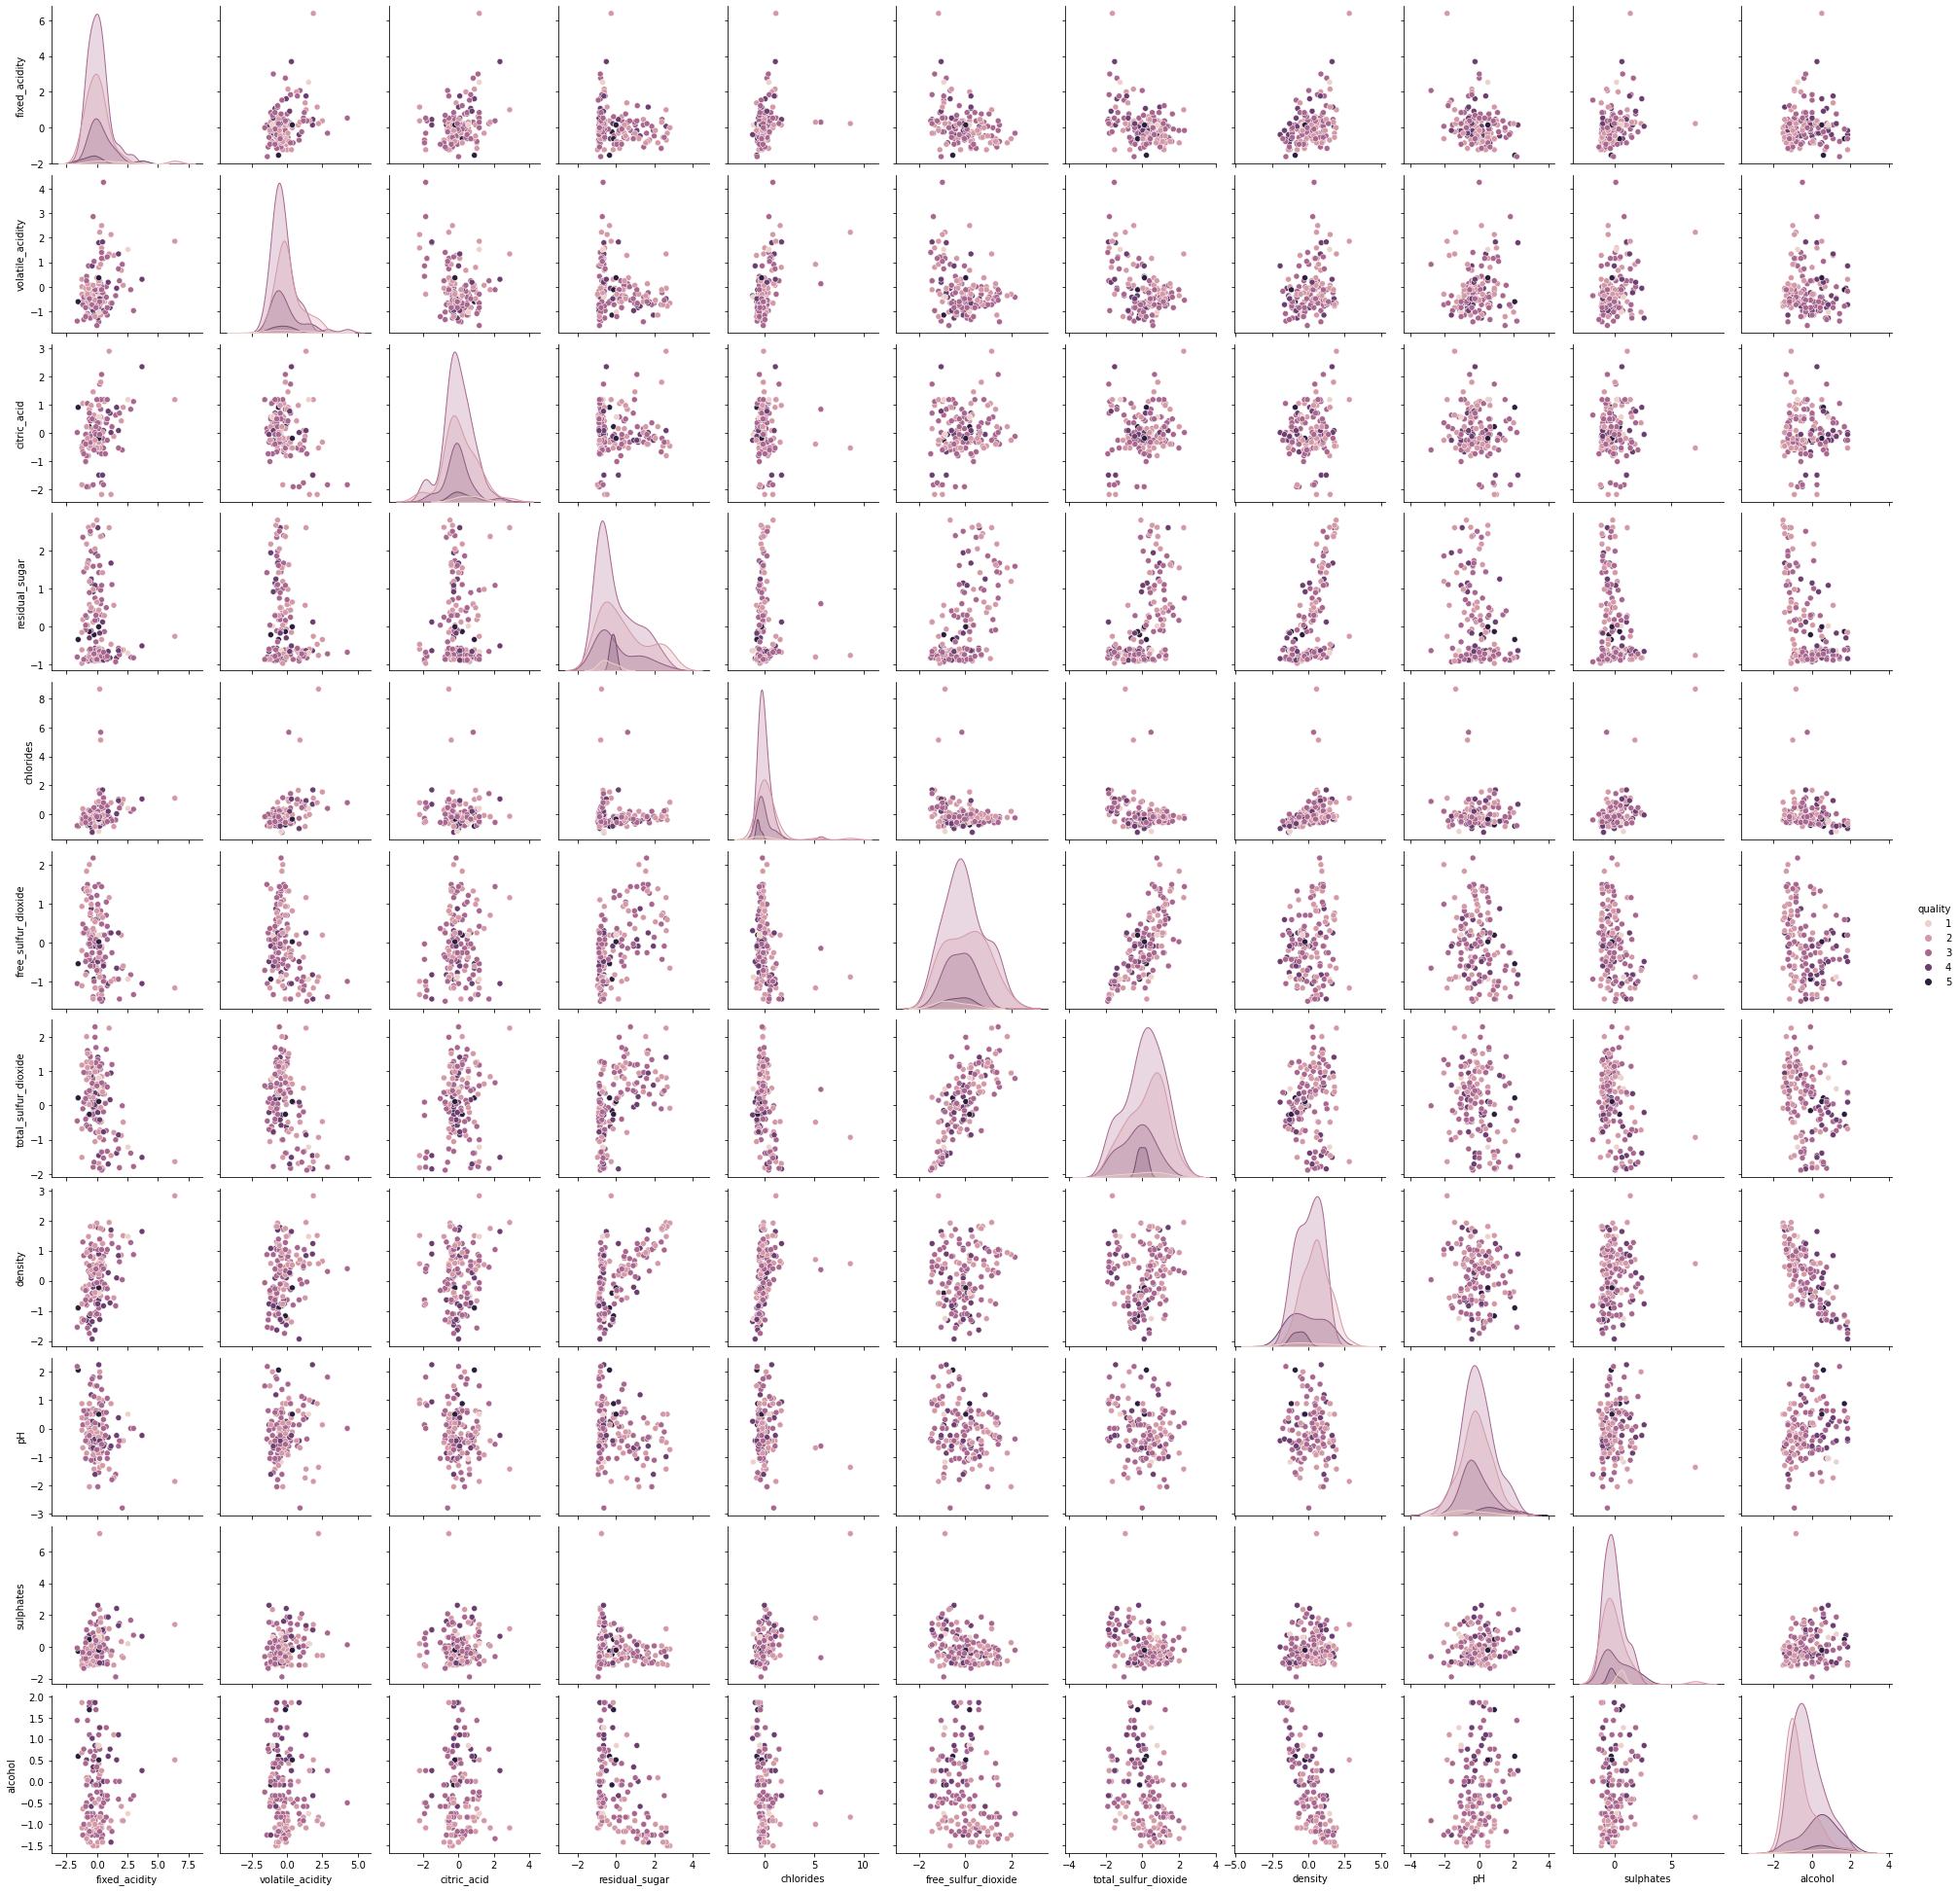

In [16]:
sns.pairplot(data.sample(n=150, random_state=1), hue=LABEL)

In [17]:
target = data.pop(LABEL)
target

0       2
1       2
2       2
3       3
4       2
       ..
6492    3
6493    2
6494    3
6495    4
6496    3
Name: quality, Length: 6497, dtype: int64

In [18]:
data = pd.get_dummies(data, dtype="float32")
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_0,type_1
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034990,1.813089,0.193097,-0.915464,1.0,0.0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701488,-0.115073,0.999579,-0.580068,1.0,0.0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768180,0.258120,0.797958,-0.580068,1.0,0.0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101702,-0.363868,0.327510,-0.580068,1.0,0.0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034990,1.813089,0.193097,-0.915464,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186157,0.320318,-0.210144,0.593818,0.0,1.0
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491696,0.924588,0.067820,-0.426066,-0.478971,-0.747766,0.0,1.0
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0.0,1.0
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003245,0.755710,-1.016626,1.935402,0.0,1.0


In [19]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)